---
<center><h1>Introduction to Machine Learning</h1></center>

---

### Project: Building Basic predictive models over the NYC Taxi Trip dataset.

### You are provided with the NYC Taxi Trip Dataset. This dataset contains information about the taxi trips that took place in different parts of New York City and how much time did that trip take to complete.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('nyc_taxi_trip_duration Dataset.csv')

In [3]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [5]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
# converting strings to datetime features

data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)

In [7]:
data['day_of_week'] = data['pickup_datetime'].dt.weekday
data['hour_of_day'] = data['pickup_datetime'].dt.hour

In [8]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,day_of_week,hour_of_day
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,3.049081,13.611698
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,1.954470,6.402853
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,0.000000,0.000000
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,1.000000,9.000000
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,3.000000,14.000000
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,5.000000,19.000000
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,6.000000,23.000000


## In this project, following are the tasks you have to complete and submit in a .zip file.
## Q1. Choose the most suitable evaluation metric and state why you chose it.

The most suitable evaluation metric for the given dataset is Mean Squared Error. As the formula for mean squared error is comprised of square of difference between the predicted value and acual value of target variable. Which will lead to the bigger error value and help us to detect the small errors.

---

## Q2. Build a benchmark model for the given dataset.

### Shuffling and Creating Train and Test Set

In [9]:
from sklearn.utils import shuffle

# Shuffling the Dataset
data = shuffle(data, random_state = 42)

#creating 4 divisions
div = int(data.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:]

In [10]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day
469114,id2380741,2,2016-05-21 10:40:14,2016-05-21 10:51:11,1,-73.981796,40.762035,-73.972267,40.781265,N,657,5,10
694852,id3946961,2,2016-01-08 18:49:27,2016-01-08 18:52:42,5,-73.980965,40.747677,-73.982704,40.741161,N,195,4,18
696324,id0833913,1,2016-05-22 00:54:10,2016-05-22 01:08:10,1,-73.951065,40.782722,-73.867691,40.833664,N,840,6,0
356496,id1336849,1,2016-06-11 10:32:12,2016-06-11 10:38:50,1,-73.987625,40.762791,-73.973518,40.762909,N,398,5,10
645318,id1610858,1,2016-04-03 10:45:51,2016-04-03 10:57:13,3,-73.964333,40.792503,-73.988609,40.758369,N,682,6,10


In [11]:
test.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day
546991,id2240736,1,2016-05-25 07:59:16,2016-05-25 08:05:02,1,-73.991364,40.732590,-74.000526,40.742283,N,346,2,7
43126,id1423404,1,2016-01-18 12:17:13,2016-01-18 12:21:13,2,-73.966225,40.768059,-73.967606,40.763073,N,240,0,12
641450,id1317268,2,2016-03-02 18:39:01,2016-03-02 18:50:12,1,-73.994926,40.766018,-74.004219,40.742523,N,671,2,18
611380,id3335546,1,2016-04-06 19:17:20,2016-04-06 19:18:03,1,-73.974388,40.793781,-73.976006,40.792339,N,43,2,19
62690,id2174190,2,2016-06-21 18:35:31,2016-06-21 18:40:56,3,-73.963440,40.798557,-73.979736,40.777878,N,325,1,18


### Simple Mean ( mean of trip_duration)

In [12]:
# storing simple mean in a new column in the test set as "simple_mean"
test['simple_mean'] = train['trip_duration'].mean()

In [13]:
test['simple_mean']

546991    951.586402
43126     951.586402
641450    951.586402
611380    951.586402
62690     951.586402
             ...    
259178    951.586402
365838    951.586402
131932    951.586402
671155    951.586402
121958    951.586402
Name: simple_mean, Length: 139872, dtype: float64

In [14]:
#calculating mean absolute error
from sklearn.metrics import mean_absolute_error as MAE

simple_mean_error = MAE(test['trip_duration'] , test['simple_mean'])
simple_mean_error

621.9954570969938

### Mean Trip Duration with respect to Day of Week

In [15]:
day_of_week = pd.pivot_table(train, values='trip_duration', index = ['day_of_week'], aggfunc=np.mean)
day_of_week

,trip_duration
day_of_week,
0,890.012810
1,984.251885
2,973.047004
3,1005.146720
4,989.699815
5,918.067036
6,888.431043


In [16]:
# initializing new column to zero
test['day_of_week_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['day_of_week'].unique():
  # Assign the mean value corresponding to unique entry
  test['day_of_week_mean'][test['day_of_week'] == i] = train['trip_duration'][train['day_of_week'] == i].mean()

In [17]:
#calculating mean absolute error
day_of_week_error = MAE(test['trip_duration'] , test['day_of_week_mean'] )
day_of_week_error

620.6622607467708

### Mean Trip Duration with respect to Hour of Day

In [18]:
hour_of_day = pd.pivot_table(train, values='trip_duration', index = ['hour_of_day'], aggfunc=np.mean)
hour_of_day

,trip_duration
hour_of_day,
0,982.268516
1,915.598624
2,853.385638
3,886.535977
4,890.512498
5,829.845634
6,726.336661
7,812.179002
8,937.732130


In [19]:
# initializing new column to zero
test['hour_of_day_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['hour_of_day'].unique():
  # Assign the mean value corresponding to unique entry
  test['hour_of_day_mean'][test['hour_of_day'] == i] = train['trip_duration'][train['hour_of_day'] == i].mean()

In [20]:
#calculating mean absolute error
hour_of_day_error = MAE(test['trip_duration'] , test['hour_of_day_mean'] )
hour_of_day_error

620.3242746375885

### Mean Trip Duration with respect to Vendor ID

In [21]:
vendor = pd.pivot_table(train, values='trip_duration', index = ['vendor_id'], aggfunc=np.mean)
vendor

,trip_duration
vendor_id,
1,838.174354
2,1049.946134


In [22]:
# initializing new column to zero
test['vendor_id_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['vendor_id'].unique():
  # Assign the mean value corresponding to unique entry
  test['vendor_id_mean'][test['vendor_id'] == i] = train['trip_duration'][train['vendor_id'] == i].mean()

In [23]:
#calculating mean absolute error
vendor_error = MAE(test['trip_duration'] , test['vendor_id_mean'] )
vendor_error

627.1274504364544

### Mean Trip Duration with respect to Passenger Count

In [24]:
passenger = pd.pivot_table(train, values='trip_duration', index = ['passenger_count'], aggfunc=np.mean)
passenger

,trip_duration
passenger_count,
0,334.733333
1,919.236280
2,1000.159939
3,1034.393923
4,1028.731304
5,1078.708147
6,1080.694100


In [25]:
# initializing new column to zero
test['passenger_count_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['passenger_count'].unique():
  # Assign the mean value corresponding to unique entry
  test['passenger_count_mean'][test['passenger_count'] == i] = train['trip_duration'][train['passenger_count'] == i].mean()

In [26]:
#calculating mean absolute error
passenger_error = MAE(test['trip_duration'] , test['passenger_count_mean'] )
passenger_error

622.5222915139927

### Mean Trip Duration with respect to both Vendor Id and Passenger Count

In [27]:
combo = pd.pivot_table(train, values = 'trip_duration', index = ['vendor_id','passenger_count'], aggfunc = np.mean)
combo

trip_duration
vendor_id passenger_count               
1         0                   514.625000
          1                   815.544883
          2                   932.030630
          3                   935.655634
          4                   966.265018
          5                   936.784722
          6                  1133.650000
2         0                   129.142857
          1                  1037.136612
          2                  1053.281189
          3                  1095.370941
          4                  1074.578032
          5                  1079.358240
          6                  1080.531284

In [28]:
# Initiating new empty column
test['Super_mean'] = 0

# Assigning variables to strings ( to shorten code length)
s1 = 'passenger_count'
s2 = 'vendor_id'
# For every Unique Value in s1
for i in test[s1].unique():
  # For every Unique Value in s2
  for j in test[s2].unique():
    # Calculate and Assign mean to new column, corresponding to both unique values of s1 and s2 simultaneously
    test['Super_mean'][(test[s1] == i) & (test[s2]==str(j))] = train['trip_duration'][(train[s1] == i) & (train[s2]==str(j))].mean()

In [29]:
#calculating mean absolute error
super_mean_error = MAE(test['trip_duration'] , test['Super_mean'] )
super_mean_error

954.9334105467856

---

## Q3. Build a K-Nearest neighbours model for the given dataset and find the best value of K.

### Load the data

In [30]:
data = pd.read_csv('nyc_taxi_trip_duration Dataset.csv')

In [31]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [32]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [33]:
# converting strings to datetime features

data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)

data['day_of_week'] = data['pickup_datetime'].dt.weekday
data['hour_of_day'] = data['pickup_datetime'].dt.hour

In [34]:
data['vendor_id'] = data['vendor_id'].astype('category')

### Outlier Detection and Removal

##### a. trip_duration

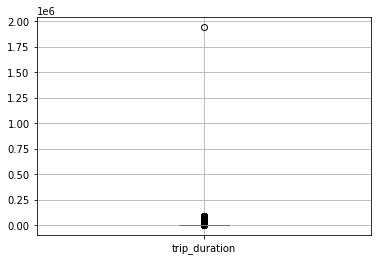

In [35]:
data.boxplot(column = ['trip_duration'])
plt.show()

In [36]:
data['log_trip_duration'] = np.log(data['trip_duration'].values + 1)
data['log_trip_duration'] = data['log_trip_duration'].astype('float16')

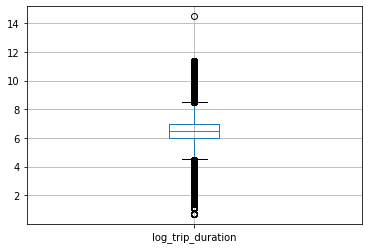

In [37]:
data.boxplot(column = ['log_trip_duration'])
plt.show()

In [38]:
data = data.loc[(data.log_trip_duration > 4.53) & (data.log_trip_duration < 8.45)]

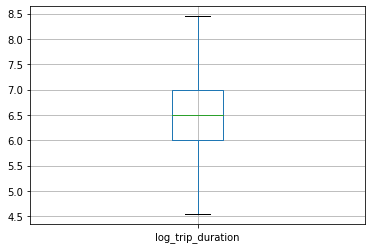

In [39]:
data.boxplot(column = ['log_trip_duration'])
plt.show()

##### b. pickup_latitude, pickup_longitude, dropoff_latitude & dropoff_longitude

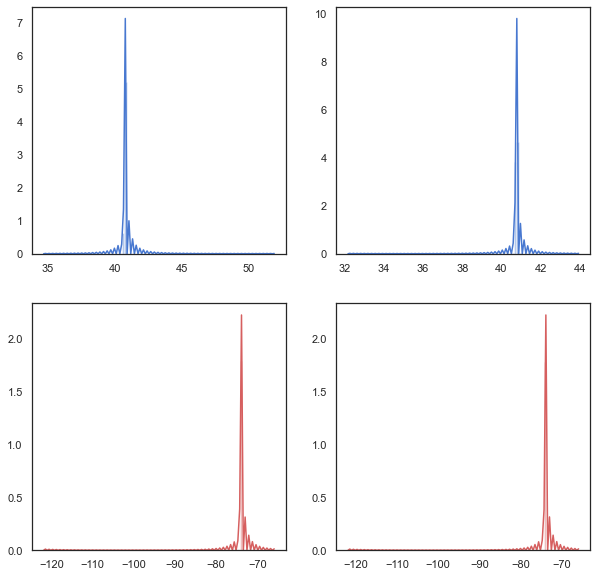

In [40]:
# Analysing Longitudes and Latitudes of the trips.

sns.set(style="white", palette="muted")
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 10), sharex = False, sharey = False)
sns.distplot(data['pickup_latitude'].values, label = 'pickup_latitude', color="b", bins = 100, ax=axes[0,0])
sns.distplot(data['pickup_longitude'].values, label = 'pickup_longitude', color="r", bins =100, ax=axes[1,0])
sns.distplot(data['dropoff_latitude'].values, label = 'dropoff_latitude', color="b", bins =100, ax=axes[0,1])
sns.distplot(data['dropoff_longitude'].values, label = 'dropoff_longitude', color="r", bins =100, ax=axes[1,1])
plt.show()

In [41]:
# Removing Outliers

data = data.loc[(data.pickup_latitude > 40.6) & (data.pickup_latitude < 40.9)]
data = data.loc[(data.dropoff_latitude>40.6) & (data.dropoff_latitude < 40.9)]
data = data.loc[(data.dropoff_longitude > -74.05) & (data.dropoff_longitude < -73.7)]
data = data.loc[(data.pickup_longitude > -74.05) & (data.pickup_longitude < -73.7)]

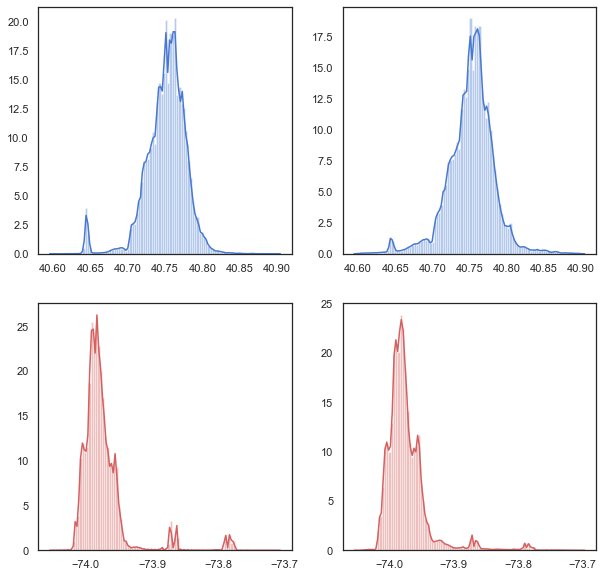

In [42]:
# Visualisation after removing outliers

sns.set(style="white", palette="muted")
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.distplot(data['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0, 0])
sns.distplot(data['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[1, 0])
sns.distplot(data['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[0, 1])
sns.distplot(data['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.show()

In [43]:
data = pd.get_dummies(data.drop(['trip_duration', 'pickup_datetime', 'dropoff_datetime', 'id'], axis = 1))

In [44]:
data.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_week,hour_of_day,log_trip_duration,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,1,-73.953918,40.778873,-73.963875,40.771164,0,16,5.992188,0,1,1,0
1,2,-73.988312,40.731743,-73.994751,40.694931,4,23,7.003906,1,0,1,0
2,2,-73.997314,40.721458,-73.948029,40.774918,6,17,7.398438,0,1,1,0
3,6,-73.961670,40.759720,-73.956779,40.780628,1,9,7.039062,0,1,1,0
4,1,-74.017120,40.708469,-73.988182,40.740631,2,6,6.742188,1,0,1,0


### Segregating variables: Independent and Dependent Variables

In [45]:
#seperating independent and dependent variables

#features
x = data.drop(['log_trip_duration'], axis=1)

#target
y = data['log_trip_duration']

x.shape, y.shape

((715982, 11), (715982,))

### Scaling the data (Using MinMax Scaler)

In [46]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [47]:
x = pd.DataFrame(x_scaled, columns = x.columns)
x.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_week,hour_of_day,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,0.111111,0.282868,0.596506,0.246491,0.570696,0.000000,0.695652,0.0,1.0,1.0,0.0
1,0.222222,0.181487,0.438738,0.158009,0.316460,0.666667,1.000000,1.0,0.0,1.0,0.0
2,0.222222,0.154950,0.404311,0.291902,0.583215,1.000000,0.739130,0.0,1.0,1.0,0.0
3,0.666667,0.260019,0.532390,0.266824,0.602259,0.166667,0.391304,0.0,1.0,1.0,0.0
4,0.111111,0.096568,0.360831,0.176833,0.468869,0.333333,0.260870,1.0,0.0,1.0,0.0


In [48]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

### Implementing KNN Regressor

In [49]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

### Elbow for Regressor

In [50]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for every value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)
    
    return test_mse

In [51]:
# Defining K range
k = range(1, 201, 10)

In [52]:
test_calc = Elbow(k)

In [53]:
test_calc

[0.263,
 0.1661,
 0.1726,
 0.1798,
 0.186,
 0.1914,
 0.1959,
 0.2,
 0.2037,
 0.2073,
 0.2104,
 0.2135,
 0.2163,
 0.2191,
 0.2218,
 0.2242,
 0.2267,
 0.229,
 0.2313,
 0.2335]

Text(0.5, 1.0, 'Elbow Curve for test')

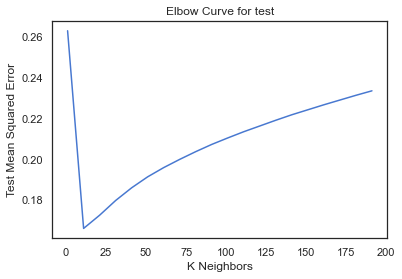

In [54]:
# Plotting the Curves
plt.plot(k, test_calc)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

##### Taking all the values between 1 and 20.

In [55]:
# Defining K range
k = range(1, 20)

In [56]:
test_calc_new = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

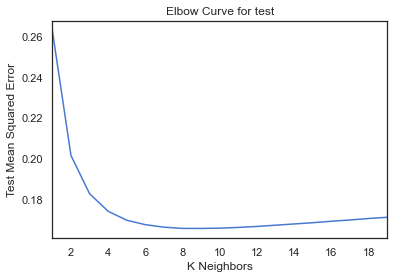

In [57]:
# Plotting the Curves
plt.plot(k, test_calc_new)
plt.xlim(1, 19)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

In [58]:
# Creating instance of KNN
reg = KNN(n_neighbors = 8)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
train_predict = reg.predict(train_x)
test_predict = reg.predict(test_x)
k_train_knn = mse(train_predict, train_y)
k_test_knn = mse(test_predict, test_y)
print('Train MSE    ', k_train_knn )
print('Test MSE     ', k_test_knn)

Train MSE     0.1277
Test MSE      0.1656


---

## Q4. Build a Linear model for the given dataset with regularisation. Attempt to interpret the variable coefficients of the Linear Model.

In [59]:
# As the dataset is already loaded and cleaned, we don't need to do preprocessing here.
data.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_week,hour_of_day,log_trip_duration,vendor_id_1,vendor_id_2,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,1,-73.953918,40.778873,-73.963875,40.771164,0,16,5.992188,0,1,1,0
1,2,-73.988312,40.731743,-73.994751,40.694931,4,23,7.003906,1,0,1,0
2,2,-73.997314,40.721458,-73.948029,40.774918,6,17,7.398438,0,1,1,0
3,6,-73.961670,40.759720,-73.956779,40.780628,1,9,7.039062,0,1,1,0
4,1,-74.017120,40.708469,-73.988182,40.740631,2,6,6.742188,1,0,1,0


### Segregating variables: Independent and Dependent Variables

In [60]:
# seperating independent and dependent variables

# Features
x = data.drop(['log_trip_duration'], axis=1)

# Target
y = data['log_trip_duration']

x.shape, y.shape

((715982, 11), (715982,))

### Splitting the data into train set and the test set

In [61]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

### Implementing Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
train_error_reg = []
test_error_reg = []

lr = LinearRegression(normalize=True)

train_x_array = np.array(train_x)
train_y_array = np.array(train_y)
test_x_array = np.array(test_x)
test_y_array = np.array(test_y)

for i in range(1, 12):
    lr.fit(train_x_array[:, 0:i], train_y)
    train_y_pred = lr.predict(train_x_array[:, 0:i])
    test_y_pred = lr.predict(test_x_array[:, 0:i])
    
    mrss_train = sum((train_y_pred-train_y)**2)/train_x_array[:, 0:i].shape[0]
    mrss_test = sum((test_y_pred-test_y)**2)/test_x_array[:, 0:i].shape[0]
    
    train_error_reg.append(mrss_train)
    test_error_reg.append(mrss_test)

In [64]:
# Initializing the dataframe to store error

col = ['train_error_reg','test_error_reg']
ind = ['Number_of_variable_%d'%i for i in range(1, train_x.shape[1]+1)]
matrix_reg = pd.DataFrame(index=ind, columns=col)

In [65]:
matrix_reg['train_error_reg'] = train_error_reg
matrix_reg['test_error_reg'] = test_error_reg
matrix_reg

,train_error_reg,test_error_reg
Number_of_variable_1,0.497651,0.497568
Number_of_variable_2,0.468567,0.468540
Number_of_variable_3,0.455572,0.455662
Number_of_variable_4,0.442698,0.442191
Number_of_variable_5,0.435190,0.434580
Number_of_variable_6,0.434636,0.434131
Number_of_variable_7,0.433576,0.433239
Number_of_variable_8,0.433573,0.433239
Number_of_variable_9,0.433574,0.433241
Number_of_variable_10,0.433496,0.433155


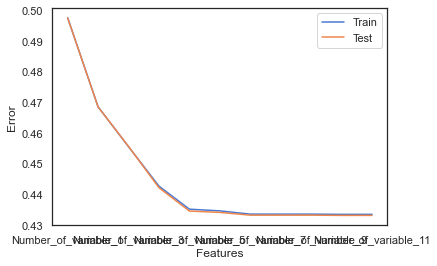

In [66]:
# Plotting the Features VS Error curve

matrix_reg[['train_error_reg','test_error_reg']].plot()
plt.xlabel('Features')
plt.ylabel('Error')
plt.legend(['Train', 'Test'])
plt.show()

### Parameters of Linear Regression

In [67]:
lr.coef_

array([ 6.55739701e-03,  3.49991493e+00, -3.10678405e+00,  3.83646586e+00,
       -3.11377712e+00, -1.08130953e-02,  5.14770908e-03, -6.12286218e+11,
       -6.12286218e+11,  1.39683523e+13,  1.39683523e+13])

### Plotting the coefficients

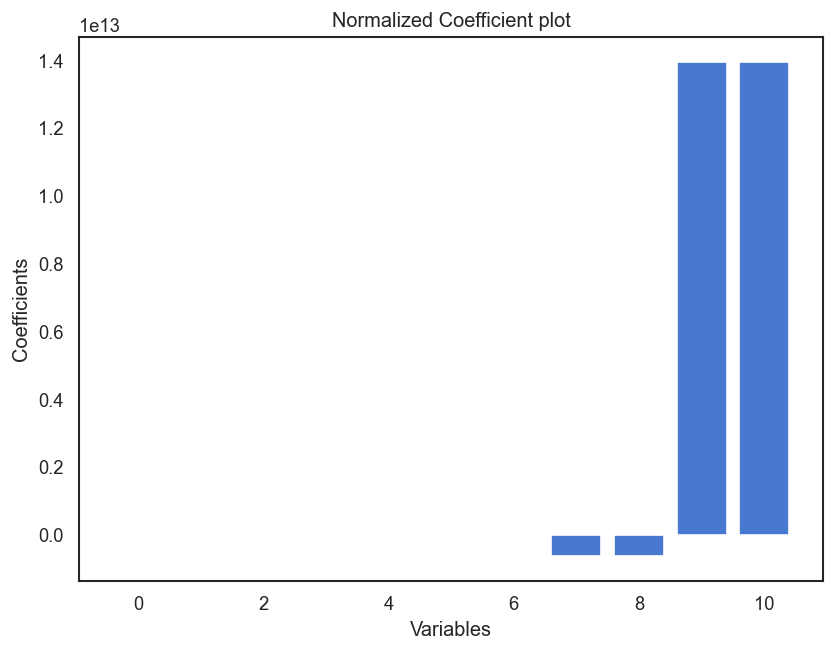

In [68]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel("Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')
plt.show()

#### Creating new subsets of data

In [69]:
# Seperating independent and dependent variables
x = data.drop(['log_trip_duration'], axis=1)
y = data['log_trip_duration']
x.shape, y.shape

((715982, 11), (715982,))

#### Arranging coefficients with features

In [70]:
Coefficients = pd.DataFrame({
    'Variable'    : x.columns,
    'coefficient' : lr.coef_
})
Coefficients.head()

,Variable,coefficient
0,passenger_count,0.006557
1,pickup_longitude,3.499915
2,pickup_latitude,-3.106784
3,dropoff_longitude,3.836466
4,dropoff_latitude,-3.113777


#### Choosing variables with sigificance greater than 0.5 ( Filtering Significant Features)

In [71]:
sig_var = Coefficients[Coefficients.coefficient > 0.5]

#### Extracting the significant subset do independent Variables

In [72]:
subset = data[sig_var['Variable'].values]
subset.head()

,pickup_longitude,dropoff_longitude,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,-73.953918,-73.963875,1,0
1,-73.988312,-73.994751,1,0
2,-73.997314,-73.948029,1,0
3,-73.961670,-73.956779,1,0
4,-74.017120,-73.988182,1,0


In [73]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset, y , random_state = 56)

In [74]:
# Importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [75]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [76]:
train_y_pred = lr.predict(train_x)
test_y_pred = lr.predict(test_x)
    
mrss_train_regression = sum((train_y_pred-train_y)**2)/train_x.shape[0]
mrss_test_regression = sum((test_y_pred-test_y)**2)/test_x.shape[0]

print('Train Error : ', mrss_train_regression)
print('Test Error  : ', mrss_test_regression)

Train Error :  0.45827009696097376
Test Error  :  0.4578604141805146


#### Plotting the coefficients

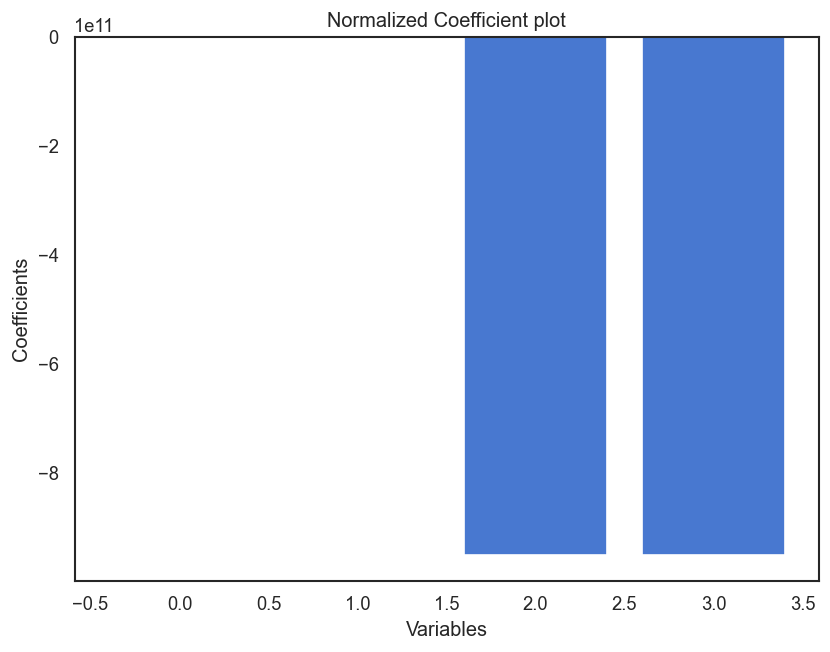

In [77]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
columns = range(len(train_x.columns))
coef = lr.coef_
plt.bar(columns, coef)
plt.xlabel("Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')
plt.show()

###### Interpretation from the linear variable Coefficients -

* The above coefficient is normalized which can be used for making final inferences out of it.
* From the above coefficient plot, we can observe that most of the variables aren't contributing in the linear model, only 2 variables are mostly contributing in the linear regression model.

### Regularisation :-

### Ridge

In [78]:
# Importing ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

In [79]:
# Setting the different values of alpha to be tested
alpha_ridge = [0, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 25]

In [80]:
train_error_ridge = []
test_error_ridge = []

for i in alpha_ridge:
    
    R = Ridge(alpha = i, normalize=True)
    R.fit(train_x, train_y)
    train_y_pred = R.predict(train_x)
    test_y_pred = R.predict(test_x)
    
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    
    train_error_ridge.append(mrss_train)
    test_error_ridge.append(mrss_test)

In [81]:
R.coef_

array([ 0.17498649,  0.16343498, -0.00773244,  0.00773244])

In [82]:
# Initializing the dataframe to store error

col = ['train_error_ridge','test_error_ridge']
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
matrix_ridge = pd.DataFrame(index=ind, columns=col)

In [83]:
matrix_ridge['train_error_ridge'] = train_error_ridge
matrix_ridge['test_error_ridge'] = test_error_ridge
matrix_ridge

,train_error_ridge,test_error_ridge
alpha_0,0.458270,0.457861
alpha_1e-08,0.458270,0.457860
alpha_0.0001,0.458270,0.457860
alpha_0.001,0.458270,0.457860
alpha_0.01,0.458272,0.457868
alpha_1,0.466032,0.465867
alpha_5,0.483454,0.483376
alpha_10,0.489397,0.489325
alpha_20,0.493195,0.493123
alpha_25,0.494038,0.493966


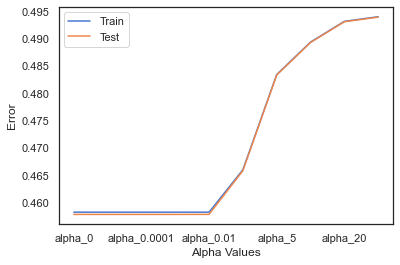

In [84]:
# Plotting the Alpha Values VS Error graph

matrix_ridge[['train_error_ridge','test_error_ridge']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('Error')
plt.legend(['Train', 'Test'])
plt.show()

##### From the above plot, we can observe that the least error we can get is at **`alpha_0.001`**.

In [85]:
matrix_ridge.min()[0]

0.45826972692086715

#### Interpreting the coefficients

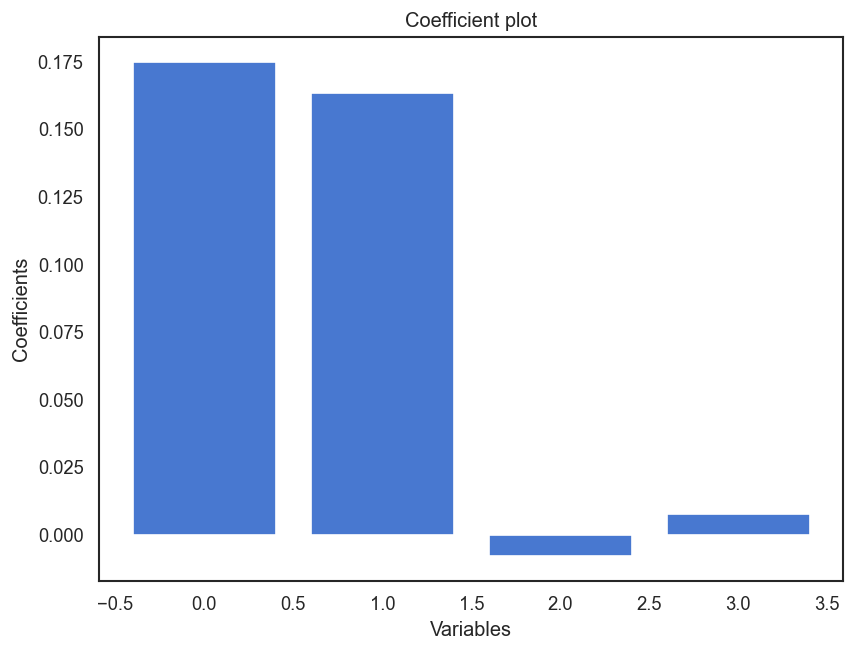

In [86]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = R.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')
plt.show()

###### Interpretation from the linear variable Coefficients -

* The above coefficient is normalized which can be used for making final inferences out of it.
* From the above coefficient plot, we can interpret that 2 of the variables are mostly contributing in the linear model while rest a=do not have any major impact on the ridge regression model.

### Lasso

In [87]:
# Importing Lasso model from sklearn's linear_model module
from sklearn.linear_model import Lasso

In [88]:
# Definining the alpha values to test
alpha_lasso = [0, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

In [89]:
train_error_lasso = []
test_error_lasso = []

for i in alpha_lasso:
    
    L = Lasso(alpha = i, normalize=True)
    L.fit(train_x, train_y)
    train_y_pred = L.predict(train_x)
    test_y_pred = L.predict(test_x)
    
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    
    train_error_lasso.append(mrss_train)
    test_error_lasso.append(mrss_test)

In [90]:
# Initializing the dataframe to store error

col = ['train_error_lasso','test_error_lasso']
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
matrix_lasso = pd.DataFrame(index=ind, columns=col)

In [91]:
matrix_lasso['train_error_lasso'] = train_error_lasso
matrix_lasso['test_error_lasso'] = test_error_lasso
matrix_lasso

,train_error_lasso,test_error_lasso
alpha_0,0.458270,0.457860
alpha_1e-10,0.458270,0.457860
alpha_1e-08,0.458270,0.457860
alpha_1e-05,0.458405,0.458035
alpha_0.0001,0.466907,0.466783
alpha_0.001,0.497738,0.497664
alpha_0.01,0.497738,0.497664
alpha_1,0.497738,0.497664
alpha_5,0.497738,0.497664
alpha_10,0.497738,0.497664


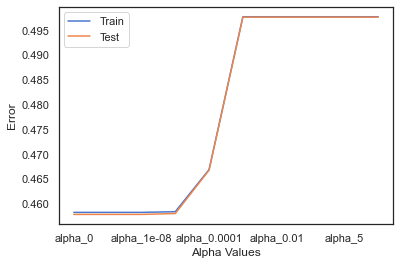

In [92]:
# Plotting the Alpha Values VS Error graph

matrix_lasso[['train_error_lasso','test_error_lasso']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('Error')
plt.legend(['Train', 'Test'])
plt.show()

##### From the above plot, we can observe that the least error we can get is at **`alpha_1e-08`**.

In [93]:
matrix_lasso.min()

train_error_lasso    0.45827
test_error_lasso     0.45786
dtype: float64

### Plotting the coefficients

In [94]:
L.coef_

array([ 0.,  0., -0.,  0.])

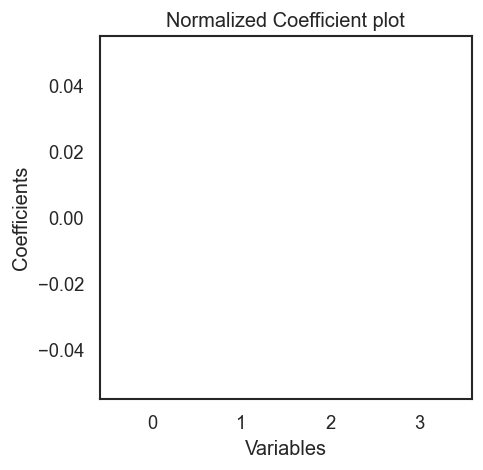

In [95]:
plt.figure(figsize=(4, 4), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = L.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')
plt.show()

###### Interpretation from the linear variable Coefficients -

* The above coefficient is normalized which can be used for making final inferences out of it.
* From the above coefficient plot, we can interpret that none of the variables are contributing in the lasso modeling.

---

## Q5. Build a Decision tree model for the given dataset. Attempt to interpret the variable importance.

### Segregating variables: Independent and Dependent Variables

In [96]:
# Seperating independent and dependent variables

# Features
x = data.drop(['log_trip_duration'], axis=1)

# Target
y = data['log_trip_duration']

x.shape, y.shape

((715982, 11), (715982,))

### Splitting the data into train set and the test set

In [97]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56, test_size = 0.25)

### Implementing Decision Tree Regressor

In [98]:
# Importing decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [99]:
# Creating the decision tree function
dt_model = DecisionTreeRegressor(random_state=10)

In [100]:
# Fitting the model
dt_model.fit(train_x, train_y)

DecisionTreeRegressor(random_state=10)

In [101]:
# Checking the training score
dt_model.score(train_x, train_y)

0.9999950762507785

In [102]:
# Checking the test score
dt_model.score(test_x, test_y)

0.5684601912091733

In [103]:
# Predictions on test set
y_pred = dt_model.predict(test_x)

#### Changing the max_depth

In [104]:
train_accuracy = []
test_accuracy = []
for depth in range(1,30):
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=10)
    dt_model.fit(train_x, train_y)
    train_accuracy.append(dt_model.score(train_x, train_y))
    test_accuracy.append(dt_model.score(test_x, test_y))

In [105]:
frame = pd.DataFrame({'max_depth':range(1,30), 'train_acc':train_accuracy, 'test_acc':test_accuracy})
frame

,max_depth,train_acc,test_acc
0,1,0.099740,0.098872
1,2,0.175118,0.175315
2,3,0.218434,0.217927
3,4,0.276628,0.275836
4,5,0.311894,0.310457
5,6,0.335355,0.334237
6,7,0.413576,0.412425
7,8,0.445711,0.442968
8,9,0.482716,0.479353
9,10,0.516750,0.510261


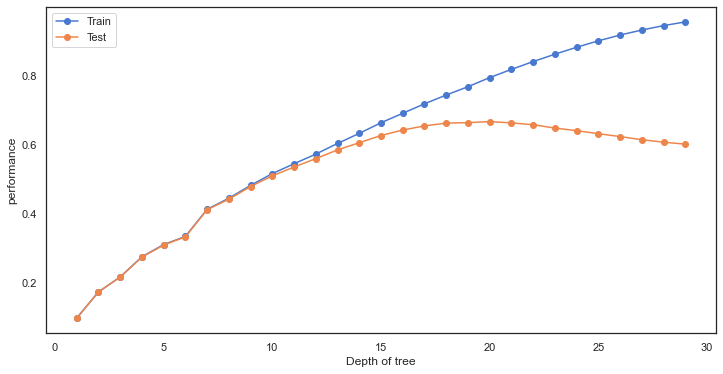

In [106]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend(['Train', 'Test'])
plt.show()

In [107]:
dt_model = DecisionTreeRegressor(max_depth=18, max_leaf_nodes=80, random_state=10)

In [108]:
# Fitting the model
dt_model.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=18, max_leaf_nodes=80, random_state=10)

In [109]:
# Training score
dt_model.score(train_x, train_y)

0.5246615145105771

In [110]:
# Test score
dt_model.score(test_x, test_y)

0.521722466581197

In [111]:
from sklearn import tree

In [112]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=train_x.columns,max_depth=2,filled=True)

In [113]:
!dot -Tpng tree.dot -o tree.png

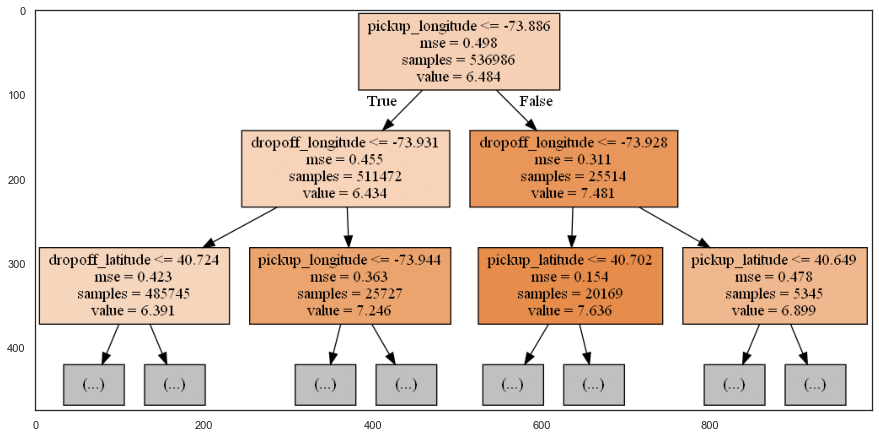

In [114]:
image = plt.imread('tree.png')
plt.figure(figsize=(15, 40))
plt.imshow(image)
plt.show()

#### Variable Importance -

* From the above decision tree model, it can be interpreted that the variable **`pickup_longitude`** is the most suitable root node because after splitting, reduction in varience, i.e., MSE, of the child nodes is least compared to other variables after the split.

---

## Q6. Plot the following Barplots:
##### a. train score of all the above models.
##### b. test (not validation!) score of all the above models.
##### c. Attempt to explain the observations from the plots (optional).

In [115]:
# Collecting scores from the models and putting them in respective variables.

# KNN
a = (1 - k_train_knn)*100
b = (1 - k_test_knn)*100

# Linear Regression
c = (1 - mrss_train_regression)*100
d = (1 - mrss_test_regression)*100

# Ridge Regression
e = (1 - matrix_ridge.min()[0])*100
f = (1 - matrix_ridge.min()[1])*100

# Lasso Regression
g = (1 - matrix_lasso.min()[0])*100
h = (1 - matrix_lasso.min()[1])*100

# Decision Tree
i = (dt_model.score(train_x, train_y))*100
j = (dt_model.score(test_x, test_y))*100

#### Train Error Bar plot

In [116]:
train_error_name = ['Train Score KNN',
                    'Train Score Linear Regression',
                    'Train Score Ridge',
                    'Train Score Lasso',
                    'Train Score Decision Tree']
score_train = [a, c, e, g, i]

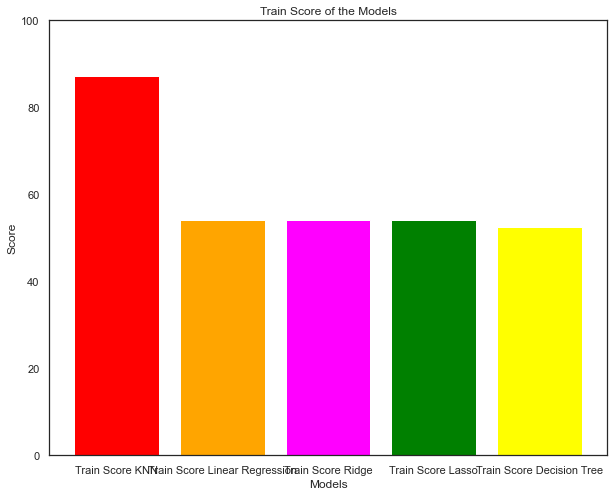

In [120]:
plt.figure(figsize = (10, 8))
plt.ylim(0, 100)
plt.bar(train_error_name, score_train, color=['red', 'orange', 'magenta', 'green', 'yellow'])
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Train Score of the Models');

Observation -

* From the above bar plot it can be observed that the train score of KNN model has the best score among all of the other models.

#### Test error Bar plot

In [118]:
test_error_name = ['Test Score KNN',
                   'Test Score Linear Regression',
                   'Test Score Ridge',
                   'Test Score Lasso',
                   'Test Score Decision Tree']
score_test = [b, d, f, h, j]

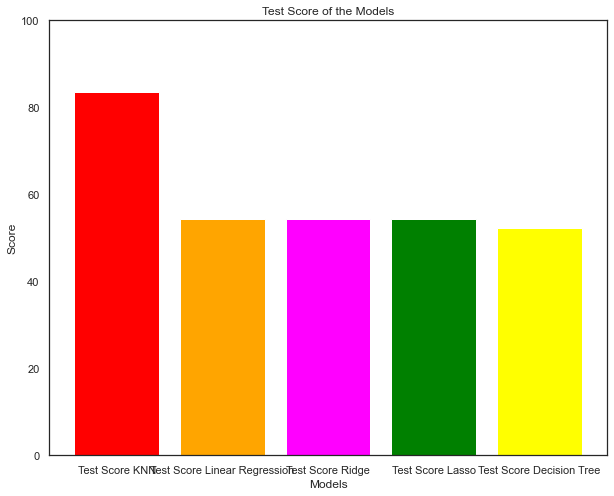

In [121]:
plt.figure(figsize = (10, 8))
plt.ylim(0, 100)
plt.bar(test_error_name, score_test, color=['red', 'orange', 'magenta', 'green', 'yellow'])
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Test Score of the Models');

Observation -

* From the above test score bar plot, KNN model is performing best with least test error and better score among all the other models.

###### **Overall observation** -
* From the above bar plots, it can be seen that both the train and test score of all models are in sync with each other and out of all these models, K-Nearest Neighbor model is performing better than the other models.